# MC for Phys106 Week 1 - Introduction to error analysis

Create raw data for $g$ measurement, twenty sets of the periods obtained by measuring 20 oscillations for each of 10 pendulum lengths.

 
lengths (m)
 [0.1 0.2 0.2 0.3 0.3 0.4 0.4 0.5 0.5 0.6]
Tideal (s)
 [0.8 0.9 1.  1.1 1.2 1.3 1.3 1.4 1.5 1.6]
sigma = 0.025 s
 
Length time measurements:
 
lengths[0] = 0.1500
Tdata[0, 0] = 0.7876
Tdata[0, 1] = 0.7671
Tdata[0, 2] = 0.7690
Tdata[0, 3] = 0.8073
Tdata[0, 4] = 0.7555
Tdata[0, 5] = 0.7742
Tdata[0, 6] = 0.7558
Tdata[0, 7] = 0.8065
Tdata[0, 8] = 0.7632
Tdata[0, 9] = 0.7500
Tdata[0, 10] = 0.7797
Tdata[0, 11] = 0.8078
Tdata[0, 12] = 0.7855
Tdata[0, 13] = 0.7870
Tdata[0, 14] = 0.7854
Tdata[0, 15] = 0.7876
Tdata[0, 16] = 0.7629
Tdata[0, 17] = 0.7256
Tdata[0, 18] = 0.7934
Tdata[0, 19] = 0.7944
 
lengths[1] = 0.2000
Tdata[1, 0] = 0.8908
Tdata[1, 1] = 0.9079
Tdata[1, 2] = 0.9031
Tdata[1, 3] = 0.9162
Tdata[1, 4] = 0.9197
Tdata[1, 5] = 0.9046
Tdata[1, 6] = 0.9005
Tdata[1, 7] = 0.8523
Tdata[1, 8] = 0.8949
Tdata[1, 9] = 0.9214
Tdata[1, 10] = 0.8598
Tdata[1, 11] = 0.8714
Tdata[1, 12] = 0.8703
Tdata[1, 13] = 0.9229
Tdata[1, 14] = 0.9219
Tdata[1, 15] = 0.8925
Tdata[1, 16] = 0.9243
Tdata[1

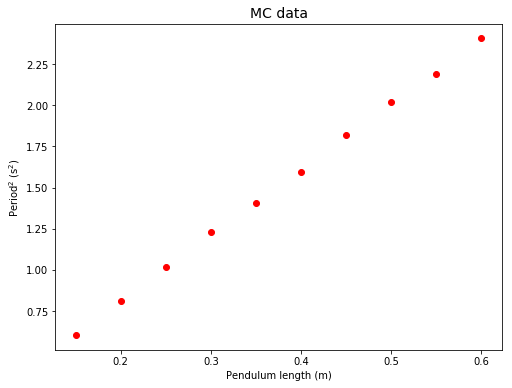

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
%matplotlib inline
#
Debug = False
printData = True
#
nLen = 10
nMeasPerLen = 20
nOscPerMeas = 20
Tdata = np.zeros((nLen, nMeasPerLen))
lenBot = 0.15
lenTop = 0.60
lengths = np.linspace(lenBot, lenTop, nLen)
g = 9.81
Tideal = 2*np.pi*np.sqrt(lengths/g)
sigma = 0.5/nOscPerMeas
print(" ")
print("lengths (m)\n",lengths)
print("Tideal (s)\n",Tideal)
print("sigma = {:5.3f} s".format(sigma))
for n in range(0, nLen):
    Tdata[n, 0:nMeasPerLen] = np.random.normal(Tideal[n], sigma, nMeasPerLen)
#
if (printData):
    print(" ")
    print("Length time measurements:")
    np.set_printoptions(precision = 3)
    for n in range(0, nLen):
        print(" ")
        print("lengths[{:d}] = {:5.4f}".format(n, lengths[n]))
        for i in range(0, nMeasPerLen):
            print("Tdata[{:d}, {:d}] = {:5.4f}".\
                  format(n, i, Tdata[n, i]))

Tmean = np.zeros(nLen)
for n in range(0, nLen):
    Tmean[n] = np.cumsum(Tdata, 1)[n, nMeasPerLen - 1]/nMeasPerLen
#
if (Debug):
    print(" ")
    print("Raw pendulum data:")
    np.set_printoptions(precision = 5)
    for n in range(0, nPoints):
        print(" ")
        print("Length {:2.3f} m".format(lengths[n]))
        print("Periods (s):\n",Tdata[n, 0:nData])
    #
#
print(" ")
print("Average periods and squared average periods ")
print("Length (m)\tAverage period (s)\tAverage period squared (s^2)")
for n in range(0, nLen):
    print("{:2.3f}\t\t{:2.3f}\t\t\t{:2.3f}".format(lengths[n], Tmean[n], \
                                                   Tmean[n]**2))
#
plt.figure(figsize = (8, 6))
#
# Plot the data
plt.plot(lengths, Tmean**2, marker = 'o', color = 'r', linestyle = '')
#plt.xlim(0, 1.2*np.max(lengths))
#plt.ylim(0, 1.2*np.max(Taverage**2))
plt.title('MC data', fontsize = 14)
plt.xlabel('Pendulum length (m)')
plt.ylabel('Period$^2$ (s$^2$)')
plt.show()

Calculate standard deviation of period measurements (taken over nOsc scillations), then values of $\Delta T$ for each pendulum length.

In [39]:
sDev = np.zeros(nLen)
for n in range(0, nLen):
    sDev[n] = np.sqrt(np.sum((Tdata[n, 0:nMeasPerLen] - \
                              Tmean[n])**2)/(nMeasPerLen - 1))
#
Terror = sDev/np.sqrt(nMeasPerLen)
#
np.set_printoptions(precision = 4)
print(" ")
print("Standard deviations in seconds\n",sDev)
print("Average standard deviation {:5.4f} s".format(np.sum(sDev)/nLen))
print("Input standard deviation {:5.3f} s".format(sigma))
print("Errors in T in seconds\n",Terror)

 
Standard deviations in seconds
 [0.0213 0.0213 0.0214 0.0234 0.0178 0.0254 0.0239 0.0218 0.0245 0.0264]
Average standard deviation 0.0227 s
Input standard deviation 0.025 s
Errors in T in seconds
 [0.0048 0.0048 0.0048 0.0052 0.004  0.0057 0.0053 0.0049 0.0055 0.0059]


Calculate the values of $\Delta T^2$ and add error bars to graph. Add also your estimated errors in the measurements of the length of the pendulum.

 
Error in T^2 in s^2
 [0.0074 0.0085 0.0097 0.0116 0.0094 0.0144 0.0144 0.0139 0.0162 0.0183]


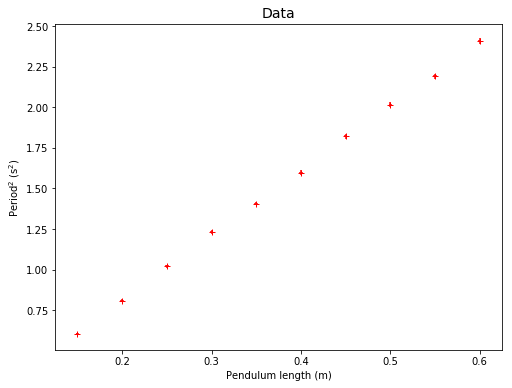

In [40]:
T2error = 2*Tmean*Terror
#
lenError = np.zeros(nLen)
lenError[0:nLen] = 0.002
print(" ")
print("Error in T^2 in s^2\n",T2error)
#
plt.figure(figsize = (8, 6))
#
# Plot the data
plt.errorbar(lengths, Tmean**2, xerr = lenError, yerr = T2error, color = 'r', \
             linestyle = '',\
            marker = '+') 
plt.title('Data', fontsize = 14)
plt.xlabel('Pendulum length (m)')
plt.ylabel('Period$^2$ (s$^2$)')
plt.show()

Carry out a $\chi^2$ fit to pendulum data.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
%matplotlib inline

Define the fit and error functions, carry out the fit, test whether it has worked and print out and plot the results if it has.

The routine used to carry out the fit is [optimize.leastsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html). This allows the definition of an error function (called a cost function in the documentation) that makes it possible to cope with errors in both $x$ and $y$.

 
Fit quality:
chisq per point = 
 [0.5 0.1 0.5 2.1 0.2 0.6 0.5 0.2 0.9 0. ]
chisq = 5.570 chisq/NDF =  0.696.
 
Parameters returned by fit:
Intercept = 0.0129 +- 0.0114
Gradient = 3.9923 +- 0.0323
 


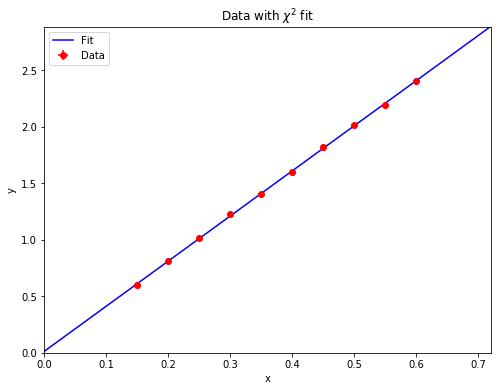

In [42]:
def fitLine(p, x):
    '''
    Straight line
    '''
    f = p[0] + p[1]*x
    return f
def fitError(p, x, y, xerr, yerr):
    '''
    Error function for straight line fit
    '''
    e = (y - fitLine(p, x))/(np.sqrt(yerr**2 + p[1]**2*xerr**2))
    return e
#
# Set initial values of fit parameters, run fit
pInit = [1.0, 1.0]
out = leastsq(fitError, pInit, args=(lengths, Tmean**2, lenError, T2error), \
              full_output = 1)
#
# Get output
pFinal = out[0]
covar = out[1]
#
# Test if fit failed (i.e. returned nan = not a number)
if np.isnan(pFinal[0]):
    print(" ")
    print("Fit failed")
    print(" ")
    print("pfinal\n",pFinal)
    print(" ")
    print("covar\n",covar)
else:
    #
    #   calculate chis**2 per point, summed chi**2 and chi**2/NDF
    chiarr = fitError(pFinal, lengths, Tmean**2, lenError, T2error)**2
    chisq = np.sum(chiarr)
    NDF = nLen - 2
    redchisq = chisq/NDF
    #
    print(" ")
    print("Fit quality:")
    np.set_printoptions(precision = 1)
    print("chisq per point = \n",chiarr)
    print("chisq = {:5.3f} chisq/NDF =  {:5.3f}.".format(chisq, redchisq))
    #
    cf = pFinal[0]
    mf = pFinal[1]
    #
    cErr = np.sqrt(covar[0, 0])
    mErr = np.sqrt(covar[1, 1])
    #
    print(" ")
    print("Parameters returned by fit:")
    print("Intercept = {:5.4f} +- {:5.4f}".format(cf, cErr))
    print("Gradient = {:5.4f} +- {:5.4f}".format(mf, mErr))
    print(" ")
    #
    # Plot data
    fig = plt.figure(figsize = (8, 6))
    xPlot = np.zeros(2)
    xPlot[1] = 1.1*Tmean[nLen - 1]**2
    plt.plot(xPlot, fitLine(pFinal, xPlot), color = 'b',\
             linestyle = '-', label = "Fit")
    plt.errorbar(lengths, Tmean**2, xerr = lenError, yerr = T2error, 
                 color ='r', marker = 'o', linestyle = '', label = "Data") 
    plt.title('Data with $\chi^2$ fit')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(0.0, 1.2*np.max(lengths))
    plt.ylim(0.0, 1.2*np.max(Tmean**2))
    plt.legend(loc = 2)
    plt.savefig("LineFitPlot.png")
    plt.show()

Calculate value of $g$ and estimate its error.

In [43]:
gravAccel = (4*np.pi**2)/mf
errAccel = (4*np.pi**2)/mf**2*mErr
print(" ")
print("Acceleration due to gravity {:5.2f} +/- {:5.2f} m/s^2".\
     format(gravAccel, errAccel))

 
Acceleration due to gravity  9.89 +/-  0.08 m/s^2
